In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import collections
import seaborn as sns

### Task A

In [2]:
properties_df = pd.read_csv("PROPERTIES.csv")
properties_df

,thread_subject,username,page_name
0,How to distinguish federal-level powers,Arctic.gnome,PropertytalkP1001.json
1,RFC,Circeus,PropertytalkP1001.json
2,RFC,Jane023,PropertytalkP1001.json
3,Use for public offices,Jura1,PropertytalkP1001.json
4,Use for non-public offices,Arctic.gnome,PropertytalkP1001.json
...,...,...,...
13393,Merging with [[Property:P7]],23PowerZ,PropertytalkP9.json
13394,Merging with [[Property:P7]],Haplology,PropertytalkP9.json
13395,Merging with [[Property:P7]],SPQRobin,PropertytalkP9.json
13396,Merging with [[Property:P7]],Andrew Gray,PropertytalkP9.json


In [3]:
# Define two dictionaries to store the network representation
netwrk_dict = {}
ids = {} # names as keys
nodes = []

# Iterate over each row in the dataframe
for _, row in properties_df.iterrows():
    
    # Create a candidate key made up of the thread subject and page name
    candidate_key = row["thread_subject"] + row["page_name"]
    username = row["username"]
    
    # Check if the user name is in the "ids" dictionary
    # If not, assign a new unique ID and add to the "ids" dictionary
    if username not in ids.keys():
        ids[username] = len(ids)
    
    # Check if the candidate key is in the "netwrk_dict" dictionary
    # If not, create a new entry with the user's ID as its first value
    if candidate_key not in netwrk_dict.keys():
        netwrk_dict[candidate_key] = [ids[username]]
    
    # If the candidate key exists, check if the user's ID is in its value list
    # If not, add it to the list
    else:
        if ids[username] not in netwrk_dict[candidate_key]:
            netwrk_dict[candidate_key].append(ids[username])
            
    # Check if the user's ID is in the "nodes" list
    # If not, add it to the list
    if ids[username] not in nodes:
        nodes.append(ids[username])

In [4]:
edges=[]
for lst in netwrk_dict.values():
    if len(lst) > 1:
        for subset in itertools.combinations(lst, 2):
            if tuple(sorted(subset)) not in edges:
                edges.append(tuple(sorted(subset)))

In [5]:
len(edges)

9198

In [7]:
edges

[(1, 2),
 (0, 4),
 (0, 3),
 (0, 5),
 (3, 4),
 (4, 5),
 (3, 5),
 (3, 11),
 (11, 12),
 (11, 13),
 (11, 14),
 (3, 12),
 (3, 13),
 (3, 14),
 (12, 13),
 (12, 14),
 (13, 14),
 (15, 16),
 (15, 17),
 (15, 18),
 (16, 17),
 (16, 18),
 (17, 18),
 (21, 22),
 (21, 23),
 (21, 24),
 (21, 25),
 (21, 26),
 (22, 23),
 (22, 24),
 (22, 25),
 (22, 26),
 (23, 24),
 (23, 25),
 (23, 26),
 (24, 25),
 (24, 26),
 (25, 26),
 (17, 27),
 (16, 27),
 (16, 28),
 (28, 29),
 (16, 29),
 (30, 31),
 (33, 34),
 (37, 38),
 (37, 39),
 (38, 39),
 (43, 44),
 (37, 43),
 (37, 44),
 (45, 46),
 (50, 51),
 (44, 52),
 (44, 53),
 (52, 53),
 (54, 55),
 (52, 56),
 (60, 61),
 (61, 62),
 (62, 63),
 (61, 63),
 (64, 65),
 (64, 66),
 (64, 67),
 (64, 68),
 (65, 66),
 (65, 67),
 (65, 68),
 (66, 67),
 (66, 68),
 (67, 68),
 (66, 69),
 (66, 70),
 (36, 66),
 (3, 66),
 (69, 70),
 (36, 69),
 (68, 69),
 (3, 69),
 (36, 70),
 (68, 70),
 (3, 70),
 (36, 68),
 (3, 36),
 (3, 68),
 (68, 71),
 (5, 71),
 (71, 72),
 (5, 68),
 (68, 72),
 (5, 72),
 (74, 75),
 (4

In [7]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

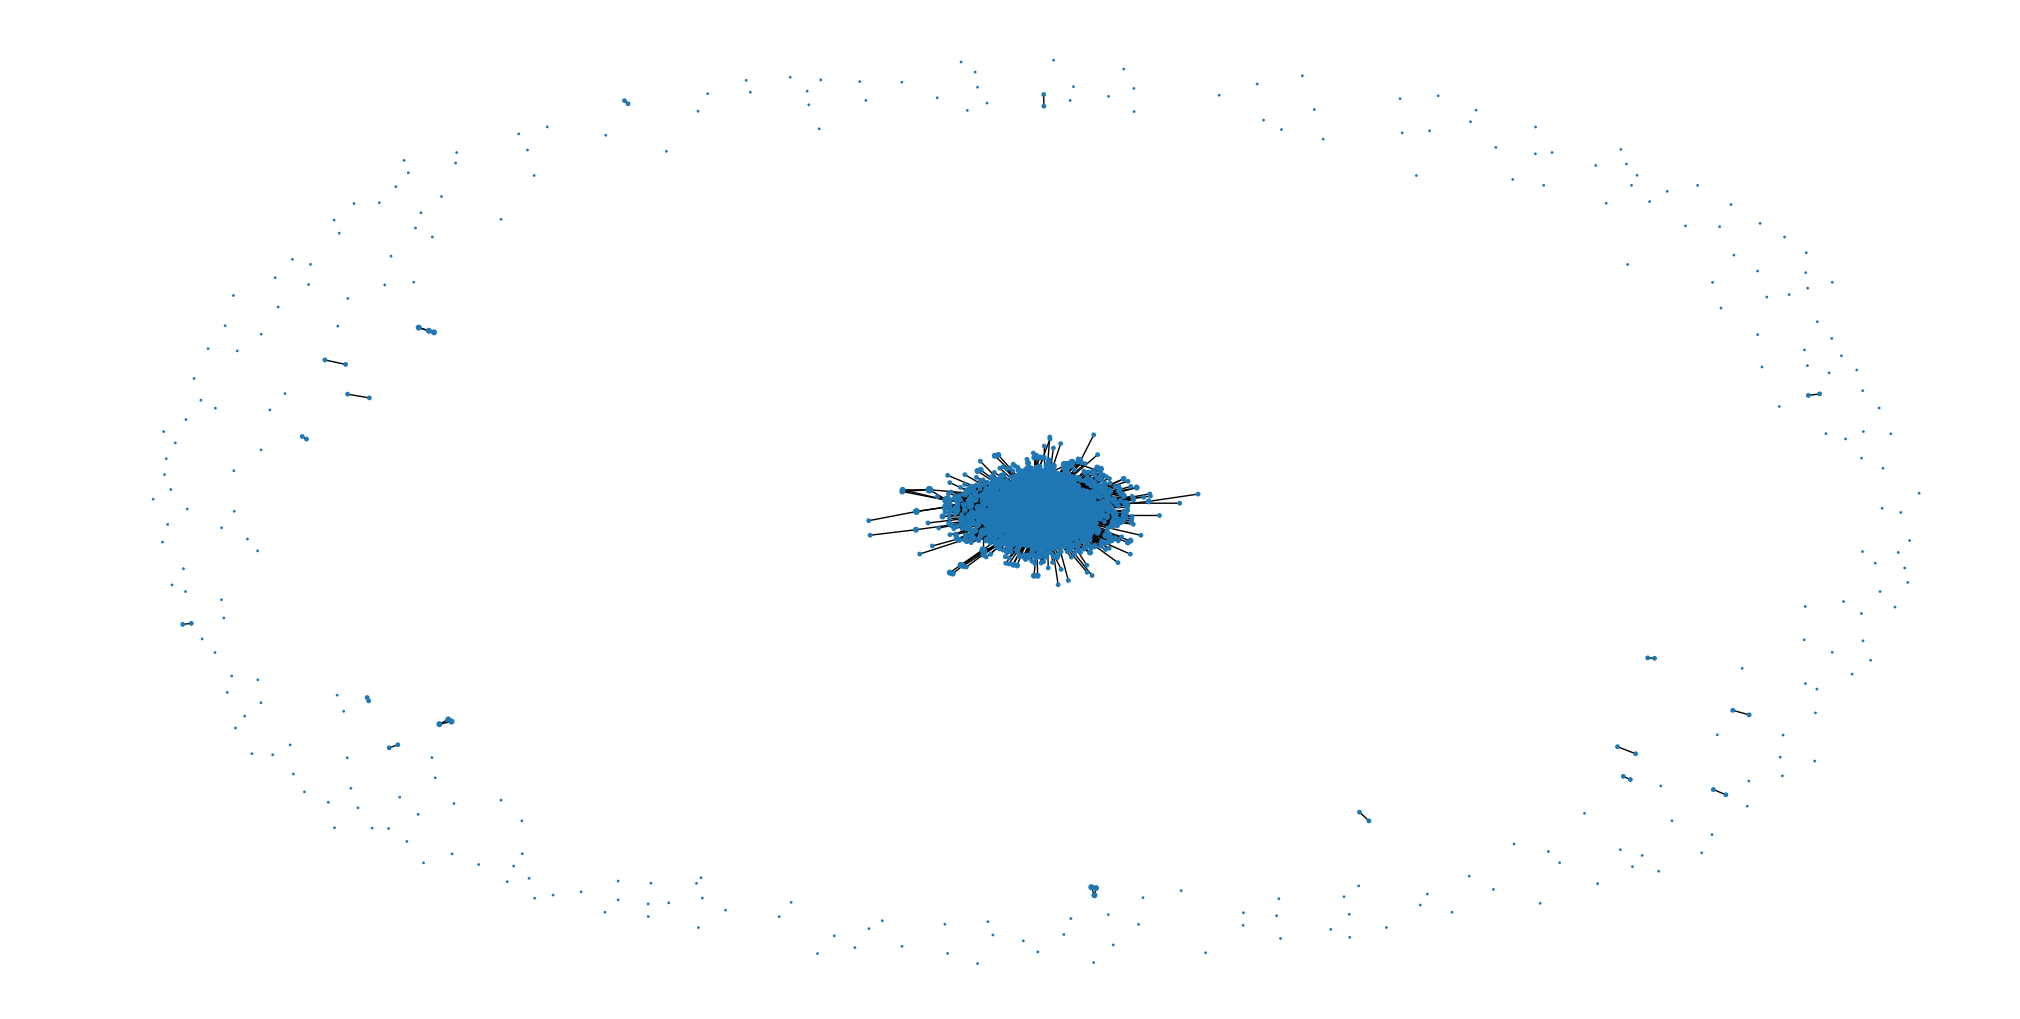

In [8]:
list_degree=list(G.degree()) #this will return a list of tuples each tuple is(node,deg)
nodes , degree = map(list, zip(*list_degree)) #build a node list and corresponding degree list
plt.figure(figsize=(20,10))
nx.draw(G, nodelist=nodes, node_size=[(v * 5)+1 for v in degree])
plt.show() #ploting the graph 

In [9]:
print(G.number_of_nodes())
print(G.number_of_edges())

1942
9198


- What data structures did you choose to represent this network? How do you keep additional information that cannot be directly encoded as nodes and edges?
- What was your algorithmic approach for building the network?
- What was the cost (in time, with respect to the input size, etc.) of building the network?

### Task B

- basic metric calculations
- random network of same node size
- small world network of same node size
- rebuild network with a different definition

In [10]:
def print_graph_statistics(graph):

    print("Number of edges: {}".format(
        graph.number_of_edges()
    ))
    print("Number of nodes: {}".format(
        graph.number_of_nodes()
    ))
    print("Number of connected components: {}".format(
        nx.number_connected_components(graph)
    ))
    print("Clustering coefficient: {}".format(
        nx.algorithms.cluster.average_clustering(graph)
    ))
    
    Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
    G0 = graph.subgraph(Gcc[0])
    
    print("-------------------------\nMetrics of Largest Connected Component\n-------------------------")
    
    print("Number of edges: {}".format(
        G0.number_of_edges()
    ))
    print("Number of nodes: {}".format(
        G0.number_of_nodes()
    ))
    print("{}% of the nodes within the entire network are in the largest connected component".format(
        round((G0.number_of_nodes()/graph.number_of_nodes())*100, 2)
    ))
    
    print("Average path length: {}".format(
        nx.average_shortest_path_length(G0)
    ))
    
    print("Clustering coefficient: {}".format(
        nx.algorithms.cluster.average_clustering(G0)
    ))
    
    try:  # attempt to compute the diameter of the graph
        diam1 = nx.algorithms.approximation.distance_measures.diameter(G0)
        print("Graph diameter (approximated): {}".format(diam1))
    except:  # an error has  occurred
        print("\nERROR: Could not compute the diameter of the graph.")
        
    try:  # attempt to compute the diameter of the graph
        diam2 = nx.diameter(G0)
        print("Graph diameter (calculated): {}".format(diam2))
    except:  # an error has  occurred
        print("\nERROR: Could not compute the diameter of the graph.")
        
    degs = sorted(G.degree, key=lambda x: x[1], reverse=True)
    print("Node {} has the largest degree in the network of {}.".format(
        degs[0][0], degs[0][1]
    ))

    degree_sequence = [d for n, d in graph.degree()]
    sum(degree_sequence)/len(degree_sequence)

    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())

    fig, ax = plt.subplots()

    plt.bar(deg, cnt, width=0.80, color="b")
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()

#- What is the degree distribution of the network?

In [11]:
def centrality_measures(graph):
    print("Degree Centrality: {}".format(
        nx.degree_centrality(graph)
    ))
    print("Eigenvector Centrality: {}".format(
        nx.eigenvector_centrality(graph)
    ))
    print("Closeness Centrality: {}".format(
        nx.closeness_centrality(graph)
    ))
    print("Betweeness Centrality: {}".format(
        nx.Betweeness_centrality(graph)
    ))

In [30]:
degree_centrality = list(nx.degree_centrality(G).items())
degree_centrality.sort(key=lambda a: a[1], reverse=True)

In [31]:
test_df = pd.DataFrame(degree_centrality[0:9])
test_df.rename(columns={0: 'nodes', 1: 'degreeCentrality'}, inplace=True)
test_df

,nodes,degreeCentrality
0,3,0.323029
1,95,0.124163
2,166,0.112828
3,33,0.099433
4,228,0.099433
5,96,0.095312
6,16,0.086553
7,104,0.084493
8,44,0.083977


Text(0.5, 0, 'degreeCentrality')

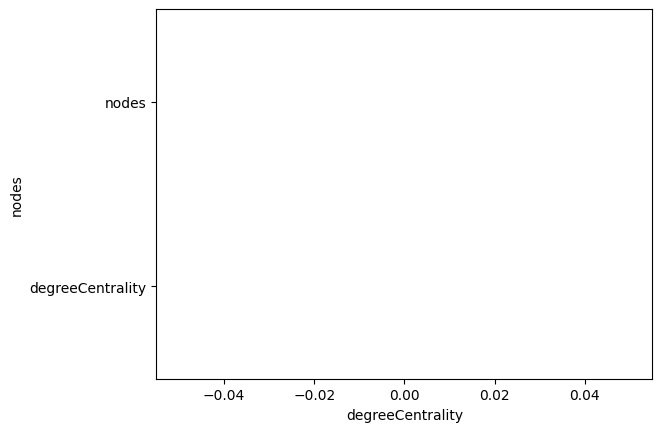

In [41]:
ax = sns.barplot(x='degreeCentrality', y='nodes', data=test_df, order=test_df.sort_values("nodes"), orient="h")
ax.set_xlabel('degreeCentrality')

In [ ]:
sns.set_style('whitegrid')
    sns.set(font_scale=0.8)
    # plt.rcParams['figure.figsize'] = (10,10)
    df_hra_colors = pd.DataFrame({
        'hra': ['red', 'green', 'blue'],
        'hex': ['#cc0000', '#40ff00', '#0000ff']
    })
    thickness = [1, 2, 3]
    thick_sum = sum(thickness)
    df_hra_colors['thickness'] = thickness
    ax = sns.barplot(x='thickness', y='hra', data=df_hra_colors,
                     palette=df_hra_colors['hex'].tolist())
    plt.xlim(0, max(thickness) + 30)
    ax.set_xlabel("Thickness")
    ax.set_ylabel("HRA")
    ax.set_title("What an Awesome Plot!")
    for i, p in enumerate(ax.patches):
        ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),
                    (p.get_x() + p.get_width(), p.get_y() + 1),
                    xytext=(5, 10), textcoords='offset points')
    plt.show()

In [68]:
centrality_measures(G)

Degree Centrality: {0: 0.022153529108706854, 1: 0.0036063884595569297, 2: 0.02163833075734158, 3: 0.32302936630602785, 4: 0.05151983513652757, 5: 0.02009273570324575, 6: 0.024214322514167955, 7: 0.029881504379185988, 8: 0.005151983513652756, 9: 0.005151983513652756, 10: 0.001545595054095827, 11: 0.02730551262235961, 12: 0.0020607934054611026, 13: 0.003091190108191654, 14: 0.03194229778464709, 15: 0.001545595054095827, 16: 0.08655332302936632, 17: 0.012879958784131892, 18: 0.003091190108191654, 19: 0.0, 20: 0.0, 21: 0.004636785162287481, 22: 0.06955177743431222, 23: 0.03554868624420402, 24: 0.002575991756826378, 25: 0.005667181865018032, 26: 0.004121586810922205, 27: 0.009273570324574962, 28: 0.006697578567748583, 29: 0.011334363730036065, 30: 0.0005151983513652757, 31: 0.02369912416280268, 32: 0.0, 33: 0.0994332818134982, 34: 0.005151983513652756, 35: 0.0674909840288511, 36: 0.013395157135497167, 37: 0.055126223596084496, 38: 0.01648634724368882, 39: 0.001545595054095827, 40: 0.0103039

Closeness Centrality: {0: 0.3558065140340521, 1: 0.26995660563785995, 2: 0.3540298192202158, 3: 0.5028307062832852, 4: 0.3862051210243467, 5: 0.35016466392849527, 6: 0.35627703309519204, 7: 0.3670527144776352, 8: 0.32211464900356795, 9: 0.32428585992607634, 10: 0.23859076552124, 11: 0.3469182235727327, 12: 0.3154023559196725, 13: 0.31748372899668187, 14: 0.3587439313270096, 15: 0.27093392239197933, 16: 0.39736975284156967, 17: 0.3228093606836619, 18: 0.3267240994743927, 19: 0.0, 20: 0.0, 21: 0.29195567016318186, 22: 0.38776150320464053, 23: 0.36876087110126504, 24: 0.273075909615431, 25: 0.2910724853355491, 26: 0.2787261456927211, 27: 0.3297633934229917, 28: 0.3361825460775945, 29: 0.33677086553323027, 30: 0.24840189233503984, 31: 0.353843830347497, 32: 0.0, 33: 0.41170032461275097, 34: 0.3266448744260236, 35: 0.38096251757152744, 36: 0.34611599746477933, 37: 0.38576273256956506, 38: 0.3394867596101112, 39: 0.27202816278936215, 40: 0.32530390295409833, 41: 0.3332715146296193, 42: 0.353

AttributeError: module 'networkx' has no attribute 'Betweeness_centrality'

Number of edges: 9198
Number of nodes: 1942
Number of connected components: 304
Clustering coefficient: 0.4705452909451652
-------------------------
Metrics of Largest Connected Component
-------------------------
Number of edges: 9174
Number of nodes: 1618
83.32% of the nodes within the entire network are in the largest connected component
Average path length: 2.900909908856227
Clustering coefficient: 0.5592082540268917
Graph diameter (approximated): 7
Graph diameter (calculated): 7
Node 3 has the largest degree in the network of 627.


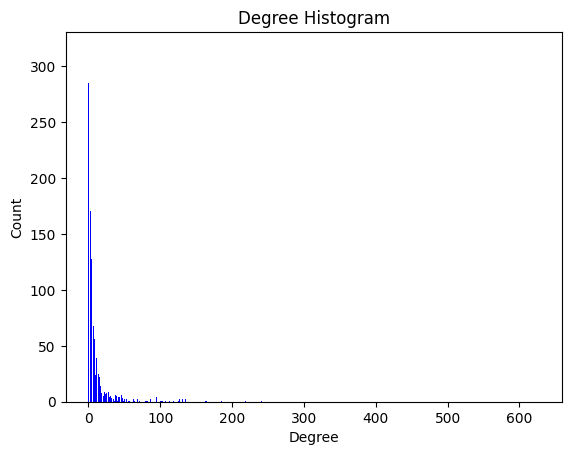

In [53]:
print_graph_statistics(G)

- What are the characteristic properties and relevant metrics and distributions of this Wikidata editor network?
- How different is this network from a random network?
- If you take this network as a complete and representative description of editor networks in collaborative knowledge projects like Wikipedia and Wikidata, what does it tell you about the way editors talk among themselves and their social activity and connections?
- How does your analysis change (metrics, comparison to random, social behaviour) if we now consider that two editors are connected iff they have both contributed to any thread in the same page, but not necessarily to the same thread?